In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [28]:
def clean_headers(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df

In [29]:
#import csvs as dfs
metadata_df = pd.read_csv('data/Mouse_metadata.csv')
results_df = pd.read_csv('data/Study_results.csv')

clean_headers(metadata_df)
clean_headers(results_df)

,Mouse_ID,Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [30]:
#merge csvs
results_merged = pd.merge(metadata_df, results_df, how = 'outer', on = 'Mouse_ID')
print('Merged results:')
results_merged

Merged results:


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
#display number of unique mice IDs
unique_id_count = results_merged['Mouse_ID'].nunique()
print(f"There are {unique_id_count} unique Mouse ID's")

There are 249 unique Mouse ID's


In [32]:
#check for mouse ID with duplicate time points.
#display data associated with mouseID
filt = results_merged.duplicated(subset = ['Mouse_ID', 'Timepoint'], keep = False)

duplicate_data = results_merged[filt]
print('Duplicated data:')
duplicate_data

Duplicated data:


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
#create new resultes_cleaned where the data is removed and use cleaned resultes_cleaned for remaining steps.
results_cleaned = results_merged.query('Mouse_ID != "g989"')


In [34]:
#display the updated number of unique ids for the cleaned data.
unique_id_count = results_cleaned['Mouse_ID'].nunique()
print(f"There are now {unique_id_count} unique Mouse ID's")

There are now 248 unique Mouse ID's


In [35]:
#create new df for summary statistics
drug_group = results_cleaned.groupby(by = 'Drug_Regimen')
summary_stats = pd.DataFrame(
    columns=[
        'Mean', 
        'Median', 
        'Variance', 
        'Stdev', 
        'SEM'
        ])

for name, drug in drug_group:
    mean = drug['Tumour_Volume_(mm3)'].mean()
    median = drug['Tumour_Volume_(mm3)'].median()
    variance = drug['Tumour_Volume_(mm3)'].var()
    std = drug['Tumour_Volume_(mm3)'].std()
    sem = drug['Tumour_Volume_(mm3)'].sem()
    
    summary_stats.loc[name] = [mean, median, variance, std, sem]
    
print('Tumor volume statistics by drug:')
summary_stats.round(2)

Tumor volume statistics by drug:


,Mean,Median,Variance,Stdev,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [36]:
results_cleaned

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
#bar and pie chart section --------------------------------------------------------------------------
#Prepare data for charts
time_points_drug = results_cleaned.groupby("Drug_Regimen")["Timepoint"].count()
time_points_drug


Drug_Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

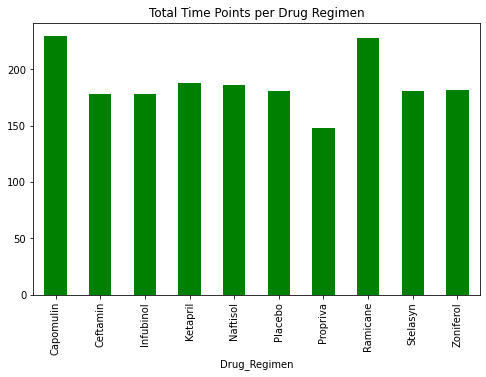

In [62]:
#bar chart 1: total number of time points for all mice tested for each drug throughout the study
#create using DataFrame.plot()
fig_size = (8, 5)
time_points_drug.plot(kind = "bar", 
                             title = "Total Time Points per Drug Regimen", 
                             figsize = fig_size,
                             color = 'green'
                             )

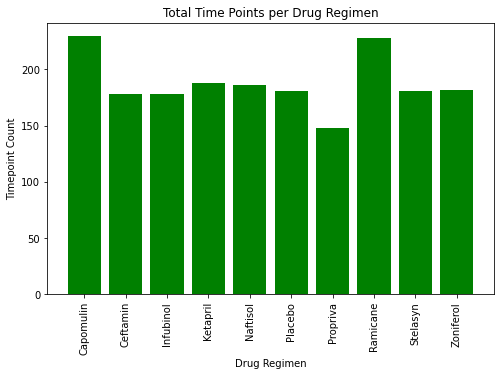

In [64]:
#bar chart 2: Create bar chart with matplotlib.pyplot
fig, chart_2 = plt.subplots(figsize = fig_size)

chart_2.bar(time_points_drug.index, time_points_drug.values, color = 'green')

chart_2.set_title("Total Time Points per Drug Regimen")

chart_2.set_xlabel("Drug Regimen")
plt.xticks(rotation = 90)

chart_2.set_ylabel("Timepoint Count")

plt.show()

In [ ]:
#prepare data for pie charts

In [ ]:
#piechart 1: distribution of female vs male mice in study using DataFrame.pyplot()

In [ ]:
#piechart 2: using pyplot

In [ ]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot----------------------------------------------
#prepare data in correct format/groups

In [ ]:
#Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

In [ ]:
#Create a grouped DataFrame that shows the last (greatest)
#time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

In [ ]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumour volume data.

#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.

#Append the resulting final tumour volumes for each drug to the empty list.

In [ ]:
#generate a box plot that shows the distribution of the final tumour volume for all the mice in each treatment group. Highlight any potential 
#outliers in the plot by changing their color and style.

In [ ]:
#Create line and scatter plot----------------------------------------------------------------------------------------
#get data in correct format

In [ ]:
#Select a mouse that was treated with Capomulin, and generate a line plot of tumour volume versus time point for that mouse.


In [ ]:
#Generate a scatter plot of tumour volume versus mouse weight for the Capomulin treatment regimen.

In [ ]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin treatment.

In [ ]:
#Plot the linear regression model on top of the previous scatter plot.